<a href="https://colab.research.google.com/github/kyokeen/nn-mnist/blob/master/Neural_Networks_MNIST_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks MNIST assignment

Activation functions are a very important part in neural networks - they dictate a layer's output as well as its backpropagation. Let us look at a few important activation functions:

###Logistic sigmoid function
![link text](https://www.researchgate.net/profile/John-Davis-33/publication/234049070/figure/fig6/AS:300093912698893@1448559372458/Logistic-sigmoid-function-Maps-real-numbers-to-the-interval-between-0-and-1.png)
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
The logistic sigmoid function outputs values in the interval $[0, 1]$ and has relatively high gradient when its input is in the inteval $[-2, 2]$. This means it has the ability to bring the output closer to each side of the curve (0 or 1), making it a prefferred activation function in classification problems, favoring clear distinctions on prediction. 
However, there are certain disadvantages to the logistic sigmoid function. As the input takes higher values, changes to the output are hardly noticeable. The gradient is small, therefore large changes in the input at higher values will render insignificant changes in the output. This means that the network struggles to learn or does so very slowly (small gradient means small changes on weights when updating them).






###Tanh
![tanh](https://www.mathworks.com/help/examples/matlab/win64/GraphHyperbolicTangentFunctionExample_01.png)
$$\tanh(x) = \frac{2}{1+e^{-2x}} - 1 = 2\sigma(2x) - 1$$

Since $tanh$ is a scaled version of the logistic sigmoid function, it preserves its properties. However, the output of $tanh$ lies in the interval $[-1, 1]$ and its gradient is larger around the inflexion point $x=0$. More specifically, changes to the input $x$ "matter" twice as much for $tanh$ as for the logistic sigmoid; this results from the scaling factor 2 in the argument of the logistic sigmoid. $tanh$ also suffers from the same "vanishing gradient" problem, just like the logistic sigmoid.

![](https://lh3.googleusercontent.com/proxy/gj1tu1yfsgJudtS5ulqnj_WGqm6ghY6PGF9vOJ8xAGptkryCApduuyDeErJD9nCSrKWK8eTwaPv6UkBn-y0oT7cs5Vm3SWfNJtVrZ7DXqwOFbNPNZy8wjqUj5Sk)

###ReLU 
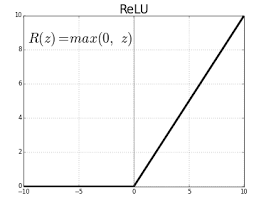

$$ReLU(x) = A(x) = max(0, x)$$

The ReLU, or Rectified Linear Unit function, is a nonlinear activation function which outputs 0 for any negative input and the input itself otherwise. It is only linear on the positive and negative halves of the plane, but overall it is not linear. Output values range from $0$ to $+inf$, meaning the activation of the neurons might become very large, as opposed to the values given by $tanh$ and the logistic sigmoid, which are bounded in narrow intervals.

The advantage of ReLU over the two sigmoids is that it can make certain neural networks lighter, less dense, by outputting 0 for any negative input. Moreover, computation of ReLU is less costly as opposed to the sigmoids which involve exponentials. 

An important downside of ReLU is called "dying ReLU" problem. Because the gradient for negative inputs is zero, the weights cannot change and part of the network remains passive.

## Problem 1 



We consider a neural network for **binary classification** with 2-dimensional
inputs $x = (x_1, x_2)^T$, two hiddens neurons and one output, and weights as in
below figure. Each node (hidden and output) has the **logistic sigmoid function** as activation function: $$\sigma(x) = \frac{1}{1+e^{-x}}$$

$$$$

![neural network](https://docs.google.com/drawings/d/e/2PACX-1vSkrkTthhermXNaCiq3eliu9q9DjbjyZYnLL3Z0uTYRBkNnHG7z_X5ywC3k6xJ0g9XCEDt-d4lgh8SS/pub?w=675&h=263)

$$$$

1. The weights are given by $(w_1, w_2, w_3, w_4, w_5, w_6) = (0.52, 0.61, 0.3, 0.4, 0.6, 0.15)$. As input we have one data-point $x = (0.45, 0.3)^T$, and the target is $t = 1$. Do the forward pass to calculate the activations of all nodes and then determine the total error of the neural network(hint:we have binary classification; pick loss function accordingly).

2. Use the back-propagation algorithm to obtain the partial derivatives of the error function with respect to the weights between the hidden layer and the
output layer ($w_5$ and $w_6$). Then, use these derivatives to update the
weights between the hidden layer and the output layer of the network
using stochastic gradient descent (SGD) with a learning rate $\eta = 0.05$.

3. Continue the back-propagation algorithm to obtain the partial derivatives of the error function with respect to the weights between the input layer and
the hidden layer $(w_1, w_2, w_3$ and $w_4)$. Once again, use SGD with the same learning rate to update the weights.

4. Finally, having updated the weights, calculate the new total error for the neural network. Note: now, the total error should be smaller than the one calculated at point 1.

> _Note_: You can solve the problem on paper by hand and then write the solution using $\LaTeX$(latex) code in the following text cell, or in Python using Numpy. Don't write just the end results.

> _Note_: The whole network can also be described by the following equations: 
$$
\begin{align*} 
{Z} &= \sigma({W_h} \cdot {X}) \\ 
{Y} &= \sigma({W_o} \cdot {Z})
\end{align*}
$$, 
where $X = \begin{bmatrix}
x_1 & x_2
\end{bmatrix}$ is a column vector representing the 2-dimensional input, $W_h = \begin{bmatrix}
w_1 & w_2\\
w_3 & w_4
\end{bmatrix}$ is a 2 by 2 matrix containing the weights of the hidden layer
, and $W_o = \begin{bmatrix}
w_5 & w_6
\end{bmatrix}$ is a 1 by 2 matrix containing weights of the output layer.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# %pylab inline
plt.rcParams["figure.figsize"] = [9,5]

!pip install -q sklearn

import numpy as np
from tqdm import tqdm  # for progress bar

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
print(sigmoid(0))

0.5


In [ ]:
w = [0.52, 0.61, 0.3, 0.4, 0.6, 0.15]
X = [0.45, 0.3]
target = 1
eta = 0.05

##1
z1 = sigmoid(X[0]*w[0] + X[1]*w[1])
z2 = sigmoid(X[0]*w[2] + X[1]*w[3])
y = sigmoid(z1*w[4] + z2*w[5])
print('z1 = %.4f, z2 = %.4f\n y = %.4f' % (z1, z2, y))

# I chose a BCE loss function, typically chosen for binary classification problems

E = -(target * np.log(y) + (1 - target) * np.log(1 - y))

print('E(w) = %.4f' % E)
print(w)

##2
diff_E_y = -target/y + (1-target)/(1-y)
aux_y = sigmoid(z1*w[4] + z2*w[5])*sigmoid(-z1*w[4] - z2*w[5])
diff_y_w5 = aux_y * z1
diff_y_w6 = aux_y * z2

w[4] = w[4] - eta * diff_E_y * diff_y_w5
w[5] = w[5] - eta * diff_E_y * diff_y_w6

print(w)

##3
diff_y_z1 = aux_y * w[4]
diff_y_z2 = aux_y * w[5]
aux_z1 = sigmoid(X[0]*w[0] + X[1]*w[1])*sigmoid(-X[0]*w[0] - X[1]*w[1])
aux_z2 = sigmoid(X[0]*w[2] + X[1]*w[3])*sigmoid(-X[0]*w[2] - X[1]*w[3])
diff_z1_w1 = aux_z1 * X[0]
diff_z1_w2 = aux_z1 * X[1]
diff_z2_w3 = aux_z2 * X[0]
diff_z2_w4 = aux_z2 * X[1]

w[0] = w[0] - eta * diff_E_y * diff_y_z1 * diff_z1_w1
w[1] = w[1] - eta * diff_E_y * diff_y_z1 * diff_z1_w2
w[2] = w[2] - eta * diff_E_y * diff_y_z2 * diff_z2_w3
w[3] = w[3] - eta * diff_E_y * diff_y_z2 * diff_z2_w4

print(w)

##4
z1 = sigmoid(X[0]*w[0] + X[1]*w[1])
z2 = sigmoid(X[0]*w[2] + X[1]*w[3])
y = sigmoid(z1*w[4] + z2*w[5])
E = -(target * np.log(y) + (1 - target) * np.log(1 - y))
print('New loss E(w) = %.4f' % E)

z1 = 0.6028, z2 = 0.5634
 y = 0.6097
E(w) = 0.4947
[0.52, 0.61, 0.3, 0.4, 0.6, 0.15]
[0.52, 0.61, 0.3, 0.4, 0.6117621103165962, 0.1609940873840205]
[0.5212862567771495, 0.6108575045180996, 0.3003477431675765, 0.40023182877838437, 0.6117621103165962, 0.1609940873840205]
New loss E(w) = 0.4895


[Solution on paper](https://drive.google.com/file/d/1lc9F-o-yZMMOVu-4RYU11_sgky_hYNf2/view?usp=sharing)

## Problem 2 - Digit classification



### Multiclass logistic regression


We will develope a that returns the digit class of an image patch $\mathcal{x}$ .
The dataset we are going to use for this is the MNIST handwritten digits dataset (http://yann.lecun.com/exdb/mnist/). We can download the data with scikit learn, and load it as follows:

In [ ]:
from sklearn.datasets import fetch_openml
# Fetch the data
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist.target.shape

(70000,)

In [ ]:
data, target = mnist.data, mnist.target.astype('int')
# Shuffle
indices = np.arange(len(data))
np.random.seed(123)
np.random.shuffle(indices)

data = data.iloc[indices].astype('float32')
target = target[indices]

# data.reset_index(drop=True)
# target.reset_index(drop=True)
data = data.sort_index()
target = target.sort_index()
# Normalize the data between 0.0 and 1.0:
data /= 255

# Split
x_train, x_valid, x_test = data[:50000], data[50000:60000], data[60000: 70000]
t_train, t_valid, t_test = target[:50000], target[50000:60000], target[60000: 70000]

x_test = x_test.reset_index(drop=True)
t_test = t_test.reset_index(drop=True)
x_valid = x_valid.reset_index(drop=True)
t_valid = t_valid.reset_index(drop=True)

MNIST consists of small 28 by 28 pixel images of written digits (0-9). We split the dataset into a training, validation and testing arrays. The variables `x_train`, `x_valid` and `x_test` are $N \times M$ matrices, where $N$ is the number of datapoints in the respective set, and $M = 28^2 = 784$ is the dimensionality of the data. The second set of variables `t_train`, `t_valid` and `t_test` contain the corresponding $N$-dimensional vector of integers, containing the true class labels.


> The *training set* is used for training the model. \\
> The *validation set* is used to check whether the model is overfitting or actually learning and for hyperparameter search(note: we do not train on *validation set*, we only do inference). \\
> The *test set* is used at the end, to get the 'official' metrics and to see how well your model performs on unseen data.

Here's a visualisation of the first 8 digits of the trainingset:

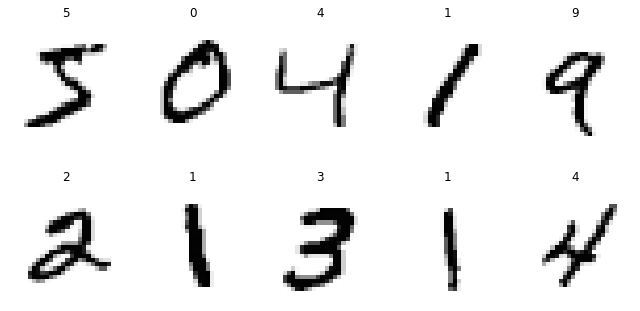

In [ ]:
def plot_digits(data, num_cols, targets=None, shape=(28,28)):
    num_digits = data.shape[0]
    num_rows = int(num_digits/num_cols)
    for i in range(num_digits):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(data.iloc[i].to_numpy().reshape(shape), interpolation='none', cmap='Greys')
        if targets is not None:
            plt.title(int(targets[i]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
plot_digits(x_train[0:10], num_cols=5, targets=t_train[0:10])

We will be constructing a multinomial logistic regression model(in order to be considered a 1 layer Neural Network, another layer should be added)

The input $x$ is multiplied with the parameters $\textbf{w}$, a bias $\textbf{b}$ is added, and the result $q$ (of size $10 \times 1$) gives us some unnormalised probabilities. Thus, we have $\ q_j = \textbf{w}_j^T \textbf{x} + b_j$. 

These are passed thorugh a [Softmax](https://victorzhou.com/blog/softmax/) function that gives us the normalised probabilities $p$ such that $\sum_j p_j = 1$. [Softmax](https://victorzhou.com/blog/softmax/) transformation is used as a last layer of many classifcation neural network models to ensure that the output of the network is a normalized distribution, regardless of the values of second-to-last layer ($\textbf{q}$).


How do we achieve that? We note $Z = \sum_k e^{q_k}$, and it is the normalizing factor. $\textbf{w}_j$ is the $j$-th column of $\textbf{W}$ (a matrix of size $784 \times 10$) corresponding to the class label, $b_j$ is the $j$-th element of $\textbf{b}$. The unnormalized probabilities are then normalized by $Z$ . This is done by $p_j = \frac{e^{q_j}}{Z}$. 


The network's output $\textbf{p}$ of size $10 \times 1$ then contains the conditional probabilities $ p(t = j \;|\; \textbf{x}, \textbf{b}, \textbf{W})$ for each digit class $j$. In summary, the computations are done in this order:

$$\textbf{x} \rightarrow \textbf{q} \rightarrow Z \rightarrow \textbf{p}$$

Given some dataset with $N$ independent, identically distributed datapoints, the likelihood is given by:

$$ \mathcal{L}(\textbf{b}, \textbf{W}) = \sum_{n=1}^N \mathcal{L}^{(n)}$$

where we use $\mathcal{L}^{(n)}$ to denote the partial likelihood evaluated over a single datapoint. It is important to see that the probability of the class label $t^{(n)}$ given the image, is given by the $t^{(n)}$-th element of the network's output $ \textbf{p}$, denoted by $ p_{t^{(n)}}$.

Wanting to __maximise__ the likelihood $\mathcal{L}^{(n)}$, which is equivalent with __minimising the negatve__ of __log__ $\mathcal{L}^{(n)}$, which we will not with $E(\textbf{w})$

#### 2.1 Gradient-based stochastic optimization


##### 2.1.1 Derive gradient equations

Derive the equations for computing the (first) partial derivatives of the loss $E(\textbf{w})$(loss if computed using the $\mathcal{L}^{(n)}$ and the ground truth label) w.r.t. all the parameters, evaluated at a _single_ datapoint $n$. 

You should start deriving the equations for $\frac{\partial E(\textbf{w})^{(n)}}{\partial q_j}$ for each $j$. For clarity, we'll use the shorthand $\delta^q_j = \frac{\partial E(\textbf{w})^{(n)}}{\partial q_j}$. You can look here for guidance: [derivative of Softmax](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/)

Complete the below derivations:



For $j = t^{(n)}$:
\begin{align}
\delta^q_j
&= p_{t^{(n)}} - 1
\end{align}
For $j \neq t^{(n)}$:
\begin{align}
\delta^q_j
&= p_j - 0
\end{align}

[Derivation](https://drive.google.com/file/d/1m8z2jTRaeHFTu05QMqcIq5EJF0ccLEEk/view?usp=sharing)

Given your equations for computing the gradients $\delta^q_j$ it should be quite straightforward to derive the equations for the gradients of the parameters of the model, $\frac{\partial E(w)^{(n)}}{\partial W_{ij}}$ and $\frac{\partial E(\textbf{w})^{(n)}}{\partial b_j}$. The gradients for the biases $\textbf{b}$ are given by:

$$
\frac{\partial E(\textbf{w})^{(n)}}{\partial b_j}
= \frac{\partial E(\textbf{w})^{(n)}}{\partial q_j}
\frac{\partial q_j}{\partial b_j}
= \delta^q_j
\cdot 1
= \delta^q_j
$$

The equation above gives the derivative of $E(\textbf{w})^{(n)}$ w.r.t. a single element of $\textbf{b}$, so the vector $\nabla_\textbf{b} E(\textbf{w})^{(n)}$ with all derivatives of $E(\textbf{w})^{(n)}$ w.r.t. the bias parameters $\textbf{b}$ is: 

$$
\nabla_\textbf{b} E(\textbf{w})^{(n)} = \mathbf{\delta}^q
$$

where $\mathbf{\delta}^q$ denotes the vector of size $10 \times 1$ with elements $\mathbf{\delta}_j^q$.

The (not fully developed) equation for computing the derivative of $E(w)^{(n)}$ w.r.t. a single element $W_{ij}$ of $\textbf{W}$ is:

$
\frac{\partial E(\textbf{w})^{(n)}}{\partial W_{ij}} =
\frac{\partial E(\textbf{w})^{(n)}}{\partial q_j}
\frac{\partial q_j}{\partial W_{ij}}
= \mathbf{\delta}_j^q
\frac{\partial q_j}{\partial W_{ij}}
$

What is $\frac{\partial q_j}{\partial W_{ij}}$? Complete the equation above.

If you want, you can give the resulting equation in vector format ($\nabla_{\textbf{w}_j} E(\textbf{w})^{(n)} = ...$), like we did for $\nabla_\textbf{b} E(\textbf{w})^{(n)}$.

$\frac{\partial q_j}{\partial W_{ij}} =x_i$

Thus:

$
\frac{\partial E(\textbf{w})^{(n)}}{\partial W_{ij}} = 
\mathbf{\delta}_j^q \frac{\partial q_j}{\partial W_{ij}} =
\mathbf{\delta}_j^qx_i
$

[Derivation](https://drive.google.com/file/d/1mOspRTH7sKb0R5uh_Xs_vBgW9aqhuOYP/view?usp=sharing)

##### 2.1.2 Implement gradient computations

Implement the gradient calculations you derived in the previous question. Write a function `gradient(x, t, w, b)` that returns the probability $p$ of class $t$ given image $x$, gradients $\nabla_{\textbf{w}_j} E(w)^{(n)}$ (for each $j$) and $\nabla_{\textbf{b}} E(w)^{(n)}$, i.e. the first partial derivatives of the loss w.r.t. the parameters $\textbf{W}$ and $\textbf{b}$, evaluated at a single datapoint (`x`, `t`).

$p$ is a scalar, $\nabla_{\textbf{w}_j} E(w)^{(n)}$ is a $784 \times 10$ matrix and $\nabla_{\textbf{b}} E(w)^{(n)}$ a $10 \times 1$ vector.

Optional: ensure the function is numerically stable.

In [ ]:
def probabilities(x, w, b):
  q = np.dot(x, w) + b
  q_stable = q - np.max(q)
  Z = np.exp(q_stable).sum()
  p = np.exp(q_stable) / Z
  return p

In [ ]:
def my_gradient(x, t, w, b):
  p = probabilities(x, w, b)
  target = np.zeros(b.shape)
  target[t] = 1
  delta = p - target
  grad_w = np.dot(np.transpose(x), delta)
  pt = p[:, t].reshape(())
  delta = delta.reshape((10,))
  return pt, grad_w, delta
  

Sanity check - test output shape and check gradient calculations 

In [ ]:
# Sanity check
# Test gradients, train on 1 sample

np.random.seed(42)
w = np.random.normal(size=(28*28,10), scale=0.001)
b = np.zeros((10,))

pt, grad_w, grad_b = my_gradient(x_train.iloc[0:1,:], t_train.iloc[0:1], w, b)

assert pt.shape == (), pt.shape
assert grad_w.shape == w.shape, grad_w.shape
assert grad_b.shape == b.shape, grad_b.shape

In [ ]:
from scipy.optimize import check_grad

np.random.seed(42)
w = np.random.normal(size=(28*28,10), scale=0.001)
b = np.zeros((10,))

def func(w):
    pt, _, _ = my_gradient(x_train.iloc[0:1,:], t_train.iloc[0:1], w.reshape(784,10), b)
    return -np.log(pt)
def grad(w):
    _, grad_w, _ = my_gradient(x_train.iloc[0:1,:], t_train.iloc[0:1], w.reshape(784,10), b)
    return grad_w.flatten()

finite_diff_error = check_grad(func, grad, w.flatten())
print('Finite difference error grad_w:', finite_diff_error)
assert finite_diff_error < 1e-3, 'Computation for w seems off'

def func(b):
    pt, _, _ = my_gradient(x_train.iloc[0:1,:], t_train.iloc[0:1], w, b)
    return -np.log(pt)
def grad(b):
    _, _, grad_b = my_gradient(x_train.iloc[0:1,:], t_train.iloc[0:1], w, b)
    return grad_b.flatten()
    
finite_diff_error = check_grad(func, grad, b)
print('Finite difference error grad_b:', finite_diff_error)
assert finite_diff_error < 1e-3, 'Computation for b seems off'



Finite difference error grad_w: 4.334382562823724e-07
Finite difference error grad_b: 3.7725152233264255e-08


##### 2.1.3. Stochastic gradient descent

Write a function `sgd_iter(x_train, t_train, w, b)` that performs one iteration of stochastic gradient descent (SGD) It should go through the trainingset once in randomized order, call `gradient(x, t, w, b)` for each datapoint to get the gradients, and update the parameters **using a small learning rate of `1E-6`**. It should returns all conditional probabilities for all datapoints and the new weights.

In [ ]:
def sgd_iter(x_train, t_train, W, b):
  eta = 1e-6
  no_training_examples = x_train.shape[0]
  for idx in range(no_training_examples):
    x = x_train.iloc[idx].to_numpy().reshape((1, x_train.shape[1]))
    t = t_train.iloc[idx].reshape((1,))
    pt, grad_w, grad_b = my_gradient(x, t, W, b)
    W = W - eta*grad_w
    b = b - eta*grad_b    
  return probabilities(x, W, b), W, b

In [ ]:
# Sanity check:
np.random.seed(1243)
w = np.zeros((28*28, 10))
b = np.zeros(10)
    
p_train, W, b = sgd_iter(x_train[:5], t_train[:5], w, b)

In [ ]:
# Sanity check:
np.random.seed(1243)
w = np.zeros((28*28, 10))
b = np.zeros(10)
    
p_train, W, b = sgd_iter(x_train.iloc[:5], t_train.iloc[:5], w, b)

#### 2.2. Train

##### 2.2.1 Train
Let's train the model for 50 and 200 iterations and observe how conditional probabilities change for the test set and the validation set.

In [ ]:
def conditional_probability(x_train, t_train, w, b):
  no_training_examples = x_train.shape[0]
  cp = 0.0
  for idx in range(no_training_examples):
    p = probabilities(x_train.iloc[idx], w, b)
    pt = p[t_train.iloc[idx]]
    cp += pt
  return cp/no_training_examples

In [ ]:
p_test_iter = [] 
p_valid_iter = [] 

def test_sgd(x_train, t_train, x_valid, t_valid, w, b):
  for idx in range(50):
    p_train, w, b = sgd_iter(x_train, t_train, w, b)
    
    train_cp = conditional_probability(x_train, t_train, w, b)
    valid_cp = conditional_probability(x_valid, t_valid, w, b)

    p_test_iter.append(train_cp)
    p_valid_iter.append(valid_cp)
    print('%d: %.5f, %.5f' % (idx, train_cp, valid_cp))
  return w, b
    
np.random.seed(1243)
w = np.zeros((28*28, 10))
b = np.zeros(10)
w,b = test_sgd(x_train, t_train, x_valid, t_valid, w, b)

In [ ]:
p_test_iter = [] 
p_valid_iter = [] 

def test_sgd(x_train, t_train, x_valid, t_valid, w, b):
  for idx in range(200):
    p_train, w, b = sgd_iter(x_train, t_train, w, b)
    
    train_cp = conditional_probability(x_train, t_train, w, b)
    valid_cp = conditional_probability(x_valid, t_valid, w, b)

    p_test_iter.append(train_cp)
    p_valid_iter.append(valid_cp)
    print('%d: %.5f, %.5f' % (idx, train_cp, valid_cp))
  return w, b
    
np.random.seed(1243)
w = np.zeros((28*28, 10))
b = np.zeros(10)
w,b = test_sgd(x_train, t_train, x_valid, t_valid, w, b)

Plotting the conditional probabilities over 50 iterations:

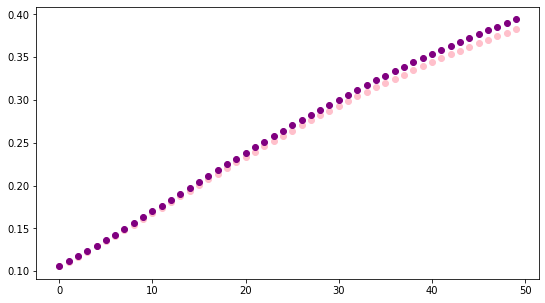

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(0, 50, 1)
plt.scatter(x, p_test_iter, c='pink')
plt.scatter(x, p_valid_iter, c='purple')

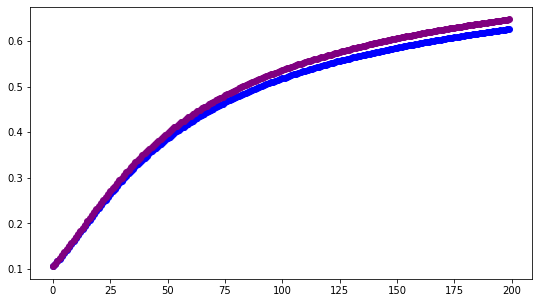

In [ ]:
# Plotted the conditional probabilities over 200 iterations

import matplotlib.pyplot as plt
x = np.arange(0, 200, 1)
plt.scatter(x, p_test_iter, c='blue')
plt.scatter(x, p_valid_iter, c='purple')

The blue curve corresponds to the validation set. The fact that it is similar to the training curve indicates that the model is not overfitting the training data. Good news! 

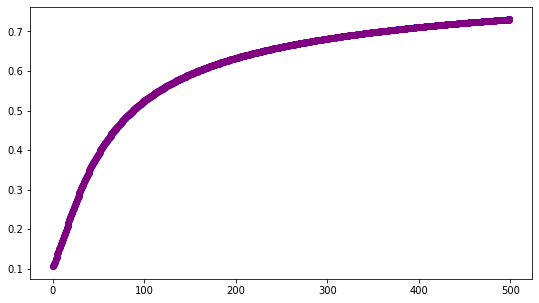

In [ ]:

x = np.arange(0, 500, 1)
plt.scatter(x, p_test_iter, c='blue')
plt.scatter(x, p_valid_iter, c='purple')

This plot is from a past run with 500 iterations. We can see that the conditional probability increases slowly after 200 iterations. It peaks around 0.7. This is not directly a measure of accuracy - it rather indicates how certain the model is for accurate predictions - precision. 

In [ ]:
# returns a list of predicted digits
def classify(x, W, b):
  y = []
  no_training_examples = x.shape[0]
  for idx in range(no_training_examples):
    prob = probabilities(x.iloc[idx], w, b)
    max = np.max(prob)
    digit = np.where(prob == max)[0]
    y.append(digit[0])
  return y

In [ ]:
# returns a set of probabilities for the target values
def set_probabilities(x, t, w, b):
  no_training_examples = x.shape[0]
  prob = [] 
  for idx in range(no_training_examples):
    p = probabilities(x.iloc[idx], w, b)
    pt = p[t[idx]]
    prob.append(pt)
  return np.array(prob)

I found two ways to calculate accuracy, both of which are useful: 


*   accuracy of certain results - the model is considered to have predicted correctly if it is at least 50% certain of that decision.
*   accuracy of max probability - here, the model outputs as its decision the digit with the largest probability from the output layer. We should expect larger values for accuracy in this case.



In [ ]:
# computes accuracy - the guess is considered correct if its corresponding conditional probability is > 0.5
def accuracy_threshold(x, t, w, b):
  prob = set_probabilities(x, t, w, b)
  return (prob[np.where(prob > 0.5)].shape[0]) / x.shape[0]

In [ ]:
accuracy_threshold(x_test, t_test, w, b)

0.7169

In [ ]:
def accuracy_max(x, t, w, b):
  no_training_examples = x.shape[0]
  acc = 0
  for idx in range(no_training_examples):
    p = probabilities(x.iloc[idx], w, b)
    max = np.max(p)
    digit = np.where(p == max)[0]
    if digit == t[idx]:
      acc = acc + 1
  return acc / no_training_examples

In [ ]:
accuracy_max(x_test, t_test, w, b)

0.8718

Indeed, for 200 iterations, the max probability accuracy is significantly larger. Let us now compute the confusion matrix.

In [ ]:
conf_matrix = np.zeros((10, 10), dtype=int)
guess = classify(x_test, W, b)

for idx in range(len(t_test)):
  target_digit = t_test[idx]
  guessed_digit = guess[idx]
  conf_matrix[guessed_digit][target_digit] = conf_matrix[guessed_digit][target_digit] + 1

In [ ]:
pandas.DataFrame(conf_matrix)

,0,1,2,3,4,5,6,7,8,9
0,946,0,16,5,3,26,20,4,9,14
1,0,1092,17,3,8,14,5,35,15,13
2,3,5,848,22,5,5,13,28,14,11
3,3,3,26,878,0,76,2,1,38,12
4,0,1,19,1,859,24,13,13,11,51
5,4,5,0,33,1,655,20,0,23,11
6,15,4,27,8,17,28,880,4,18,1
7,1,0,23,20,2,9,0,890,13,27
8,8,25,48,26,11,38,5,10,812,11
9,0,0,8,14,76,17,0,43,21,858


A few observations:


*   "0" and "1" were very easy for the models to guess
*   "5" not as much - a lot of features of the digit 5 are similar to digits 3 and 8;
*   "4" is very similar to "9"



##### 2.2.2 Visualize weights
Visualize the resulting parameters $\textbf{W}$ after a few iterations through the training set, by treating each column of $\textbf{W}$ as an image.

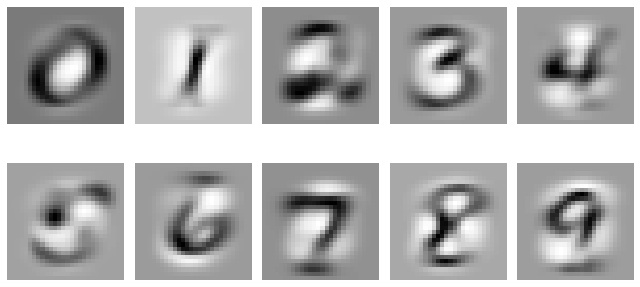

In [ ]:
plot_digits(np.transpose(w), 5, None, shape=(28, 28)) ## weights after 50 iterations

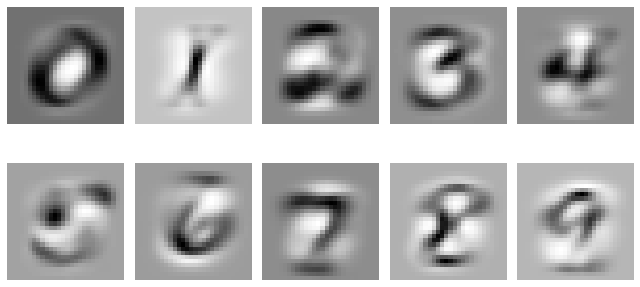

In [ ]:
plot_digits(pandas.DataFrame(np.transpose(w)), 5, None, shape=(28, 28)) ##weights after 200 iterations

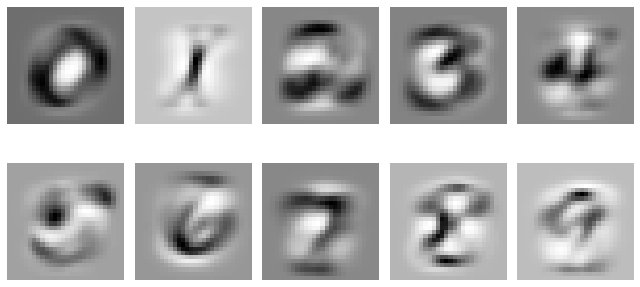

In [ ]:
plot_digits(np.transpose(w), 5, None, shape=(28, 28)) ##weights after 500 iterations

The images representing columns of the weight matrix show similarity with the corresponding digit neurons that they influence when computing the model output. I believe that the black pixels that form the shape of the target digit correspond to high weight values that "encourage" certain digit features, whereas white pixels "discourage" all other features. For example, the digit 0 is a circle, therefore images with pixels that align with the black pixels of the 0 weight column (which resemble a circle) will result in high activation values for the 0 neuron. Any other features will be "discouraged", weighing down the probability of the digit being classified as a zero - this is explained by the white pixels inside the hollow, or the white auras surrounding the other digits.

##### 2.2.3. Visualize the 8 hardest and 8 easiest digits
Visualize the 8 digits in the validation set with the highest probability of the true class label under the model.
Also plot the 8 digits that were assigned the lowest probability of the true class label under the model.

In [ ]:
def vset_probabilities(x, t, w, b):
  no_training_examples = x.shape[0]
  vp = [] 
  for idx in range(no_training_examples):
    p = probabilities(x.iloc[idx], w, b)
    pt = p[t[idx]]
    vp.append([pt, idx])
  return vp

In [ ]:
vp = vset_probabilities(x_valid, t_valid, w, b)

In [ ]:
vp = np.array(vp)
vp = vp[np.argsort(vp[:,0])]
hard=vp[0:8]
easy=vp[9992:10000]

In [ ]:
def plot_digits_2(index_list, data, num_cols, targets=None, shape=(28,28)):
  to_plot = []
  for idx in range(len(index_list)):
    to_plot.append(data.iloc[int(index_list[idx])])
  to_plot = np.array(to_plot)
  print(to_plot.shape)
  plot_digits(pandas.DataFrame(to_plot), 4, None, (28,28))

(8, 784)


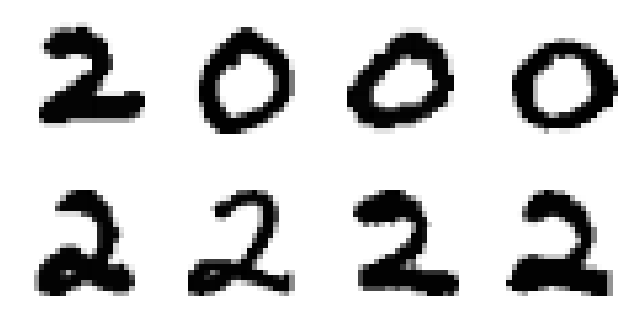

In [ ]:
plot_digits_2(easy[:,1], x_valid, 4, None, (28,28))

(8, 784)


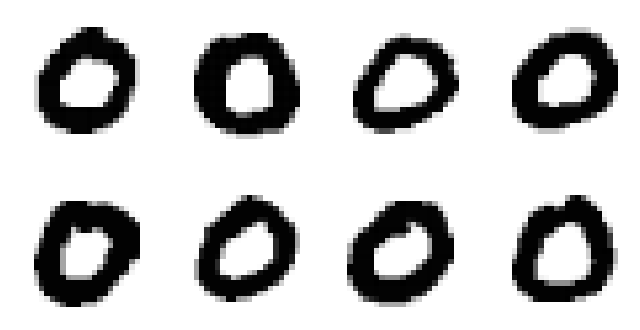

In [ ]:
plot_digits_2(easy[:,1], x_valid, 4, None, (28,28))

(8, 784)


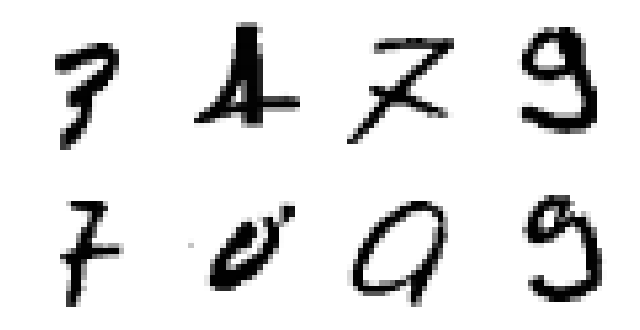

In [ ]:
plot_digits_2(hard[:,1], x_valid, 4, None, (28,28))

(8, 784)


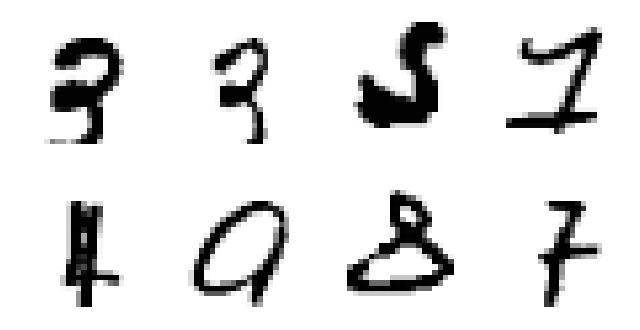

In [ ]:
plot_digits_2(hard[:,1], x_valid, 4, None, (28,28))

It makes sense that a zero is an easy digit to classify, since it has the least amount of features. Two is rather an unexpected result and so is the absence of "1" here. I would expect that "1" is the easiest digit to classify given the large value in the matrix. 

The explanation could be that the confusion matrix is built on how often the model guesses the digit, whereas here I looked at how sure the model was on the correct guess. 

The digits that the model found hardest to classify are, as expected, complicated digits with many features that might pose a problem even for humans. Moreover, digits 1 and 7 are very similar, and so are 3 and 9, making it even more difficult for the model to provide a categorical (high probability) answer.



### Hidden layer network - TODO


In [ ]:
def activate_sigmoid(x):
  return sigmoid(x)

In [ ]:
def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
def my_softmax(x):
  x_stable = x - np.max(x)
  Z = np.exp(x_stable).sum()
  p = np.exp(x_stable) / Z
  return p

In [ ]:
def my_softmax_derivative(x):
  x_stable = x - np.max(x)
  exps = np.exp(x_stable)
  return exps / np.sum(exps) * (1 - exps / np.sum(exps))

In [ ]:
def forward(x, w, b):
  return np.dot(x, w) + b

In [ ]:
def probabilities(x, w, b):
  q = np.dot(x, w) + b
  q_stable = q - np.max(q)
  Z = np.exp(q_stable).sum()
  p = np.exp(q_stable) / Z
  return p

In [ ]:
def conditional_probability(x_train, t_train, w, b):
  no_training_examples = x_train.shape[0]
  cp = 0.0
  for idx in range(no_training_examples):
    p = probabilities(x_train.iloc[idx], w, b)
    pt = p[t_train.iloc[idx]]
    cp += pt
  return cp/no_training_examples

In [ ]:
def my_gradient2(x, p, t, w, b):
  # p = forward(x, w, b)
  target = np.zeros(b.shape)
  print("t is", t)
  target[t] = 1
  delta = p - target
  grad_w = np.dot(np.transpose(x), delta)
  pt = p[:, t].reshape(())
  delta = delta.reshape((10,))
  return pt, grad_w, delta

In [ ]:
def my_gradient2_inter(x, p, t, w, b): #backprop for sigmoid hidden layer
  # p = forward(x, w, b)
  target = t
  delta = p - target # derivative here
  grad_w = np.dot(np.transpose(x), delta)
  pt = p[:, t].reshape(())
  delta = delta.reshape((10,))
  return pt, grad_w, delta

In [ ]:
def sgd_iter2(x_train, t_train, w0, w1, b0, b1):
  eta = 1e-6
  no_training_examples = x_train.shape[0]
  for idx in range(no_training_examples):

    x = x_train.iloc[idx].to_numpy().reshape((1, x_train.shape[1]))
    t = t_train.iloc[idx]

    p0, p1 = forward_pass(x, w0, w1, b0, b1)

    pt, grad_w1, grad_b1 = my_gradient2(p0, p1, t, w1, b1)
    ptt, grad_w0, grad_b0 = my_gradient2_inter(x, p0, pt, w0, b0)

    w1 = w1 - eta*grad_w1
    b1 = b1 - eta*grad_b1 

    w0 = w0 - eta*grad_w0
    b0 = b0 - eta*grad_b0
      
  return probabilities(x, w, b), w0, w1, b0, b1

In [ ]:
p_test_iter = [] 
p_valid_iter = [] 

def test_sgd2(x_train, t_train, x_valid, t_valid, w0, w1, b0, b1):
  for idx in range(50):
    p_train, w0, w1, b0, b1 = sgd_iter2(x_train, t_train, w0, w1, b0, b1)
    
    train_cp = conditional_probability(x_train, t_train, w, b)
    valid_cp = conditional_probability(x_valid, t_valid, w, b)

    p_test_iter.append(train_cp)
    p_valid_iter.append(valid_cp)
    print('%d: %.5f, %.5f' % (idx, train_cp, valid_cp))
  return w0, w1, b0, b1


In [ ]:
np.random.seed(1243)
hidden_layer_size = 16

w0 = np.random.rand(28*28, 16)
w1 = np.random.rand(16, 10)

b0 = np.random.rand(16)
b1 = np.random.rand(10)

w0, w1, b0, b1 = test_sgd2(x_train, t_train, x_valid, t_valid, w0, b0, w1, b1)

In [ ]:
t_train

0        5
1        0
2        4
3        1
4        9
        ..
49995    5
49996    0
49997    8
49998    4
49999    8
Name: class, Length: 50000, dtype: int64

In [ ]:
def forward_pass(x, w0, b0, w1, b1):
  first = x
        # input layer to hidden layer 
  second = forward(first, w0, b0)
  second_activated = activate_sigmoid(second)

        # hidden layer to output layer
  out = forward(second_activated, w1, b1)
  out_activated = my_softmax(out)

  return second_activated, out_activated

In [ ]:
def backward_pass(y, output, w0, b0, w1, b1):
  y_vec = np.zeros(output.shape)
  y_vec[y] = 1

  return -1